###  Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Leitura 

In [2]:
df = pd.read_csv("C:/Users/karin/Desktop/EBAC_clientes/ecommerce_preparados.csv")
df.head()


,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,...,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...",...,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,...,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,...,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...",...,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,...,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


In [3]:
df.columns

Index(['Unnamed: 0', 'Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca',
       'Material', 'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3',
       'Qtd_Vendidos', 'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax',
       'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod', 'Material_Cod',
       'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq'],
      dtype='object')

### Gráfico de Histograma (para a coluna Preço)

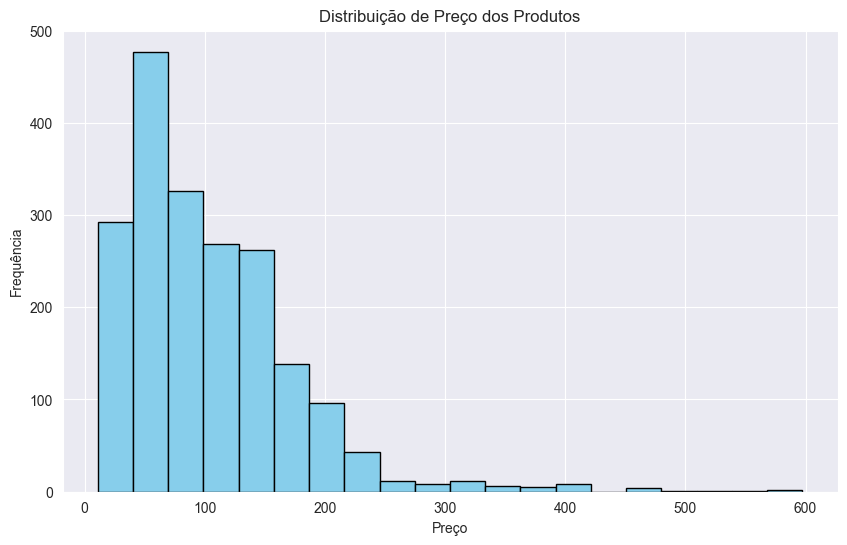

In [4]:
plt.figure(figsize=(10,6))
plt.hist(df['Preço'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Preço dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


### Gráfico de Dispersão (entre Desconto e Qtd_Vendidos)

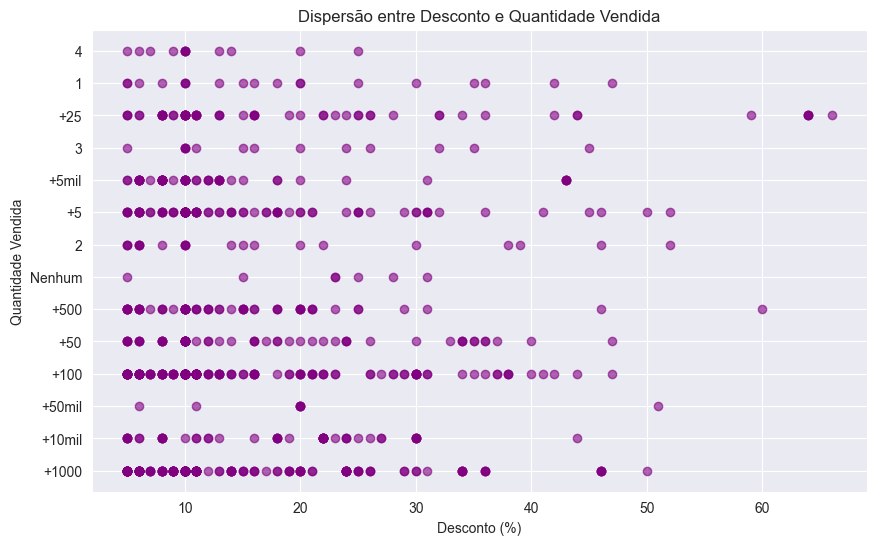

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['Desconto'], df['Qtd_Vendidos'], alpha=0.6, color='purple')
plt.title('Dispersão entre Desconto e Quantidade Vendida')
plt.xlabel('Desconto (%)')
plt.ylabel('Quantidade Vendida')
plt.show()


### Mapa de calor com Spearman

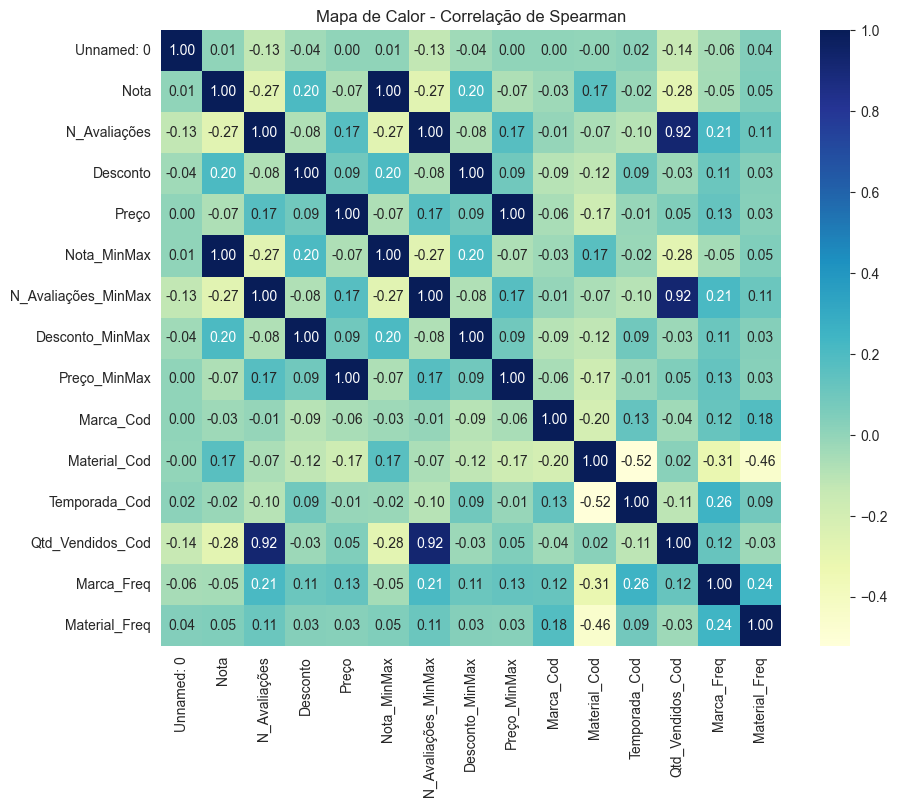

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mapa de Calor - Correlação de Spearman')
plt.show()



### Gráfico de Barras (distribuição por Marca)

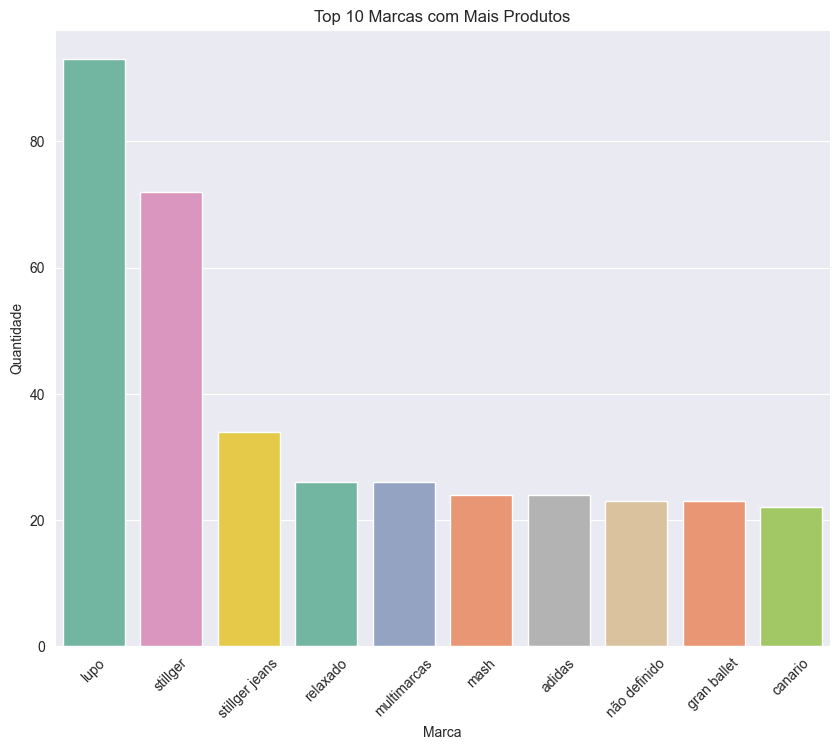

In [15]:
top_marcas = df['Marca'].value_counts().nlargest(10).index

plt.figure(figsize=(10,8))
sns.countplot(
    x='Marca',
    hue='Marca',
    data=df[df['Marca'].isin(top_marcas)],
    order=top_marcas,
    palette='Set2',
    legend=False  # Evita a legenda duplicada
)
plt.title('Top 10 Marcas com Mais Produtos')
plt.xlabel('Marca')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


### Gráfico de Pizza (distribuição por Gênero, top 5 e demais são "Outros")

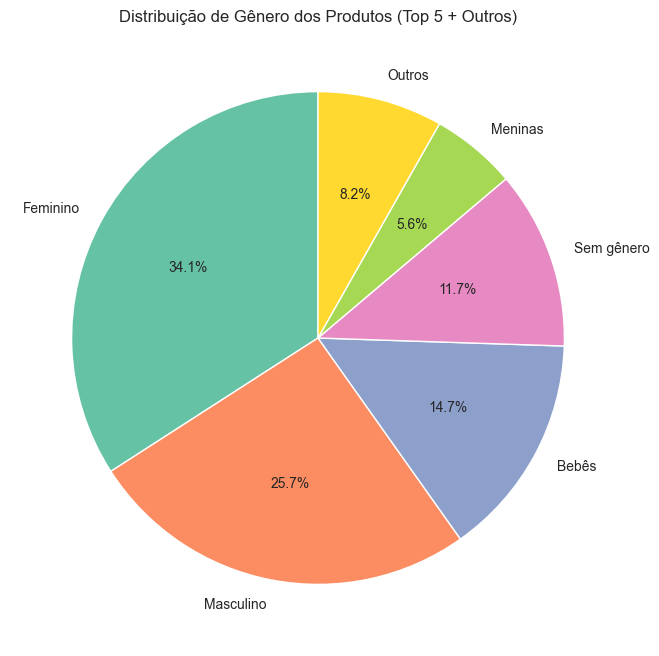

In [23]:
# Conta os valores da coluna Gênero
top_generos = df['Gênero'].value_counts()

# Seleciona os 5 mais frequentes
top5 = top_generos[:5]

# Soma o restante em "Outros"
outros = top_generos[5:].sum()

# Concatena usando pd.concat
dados_pizza = pd.concat([top5, pd.Series({'Outros': outros})])

# Cria o gráfico de pizza
plt.figure(figsize=(10,8))
dados_pizza.plot.pie(
    autopct='%.1f%%',
    colors=sns.color_palette('Set2'),
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribuição de Gênero dos Produtos (Top 5 + Outros)')
plt.ylabel('')
plt.show()


### Gráfico de Densidade (para Nota)

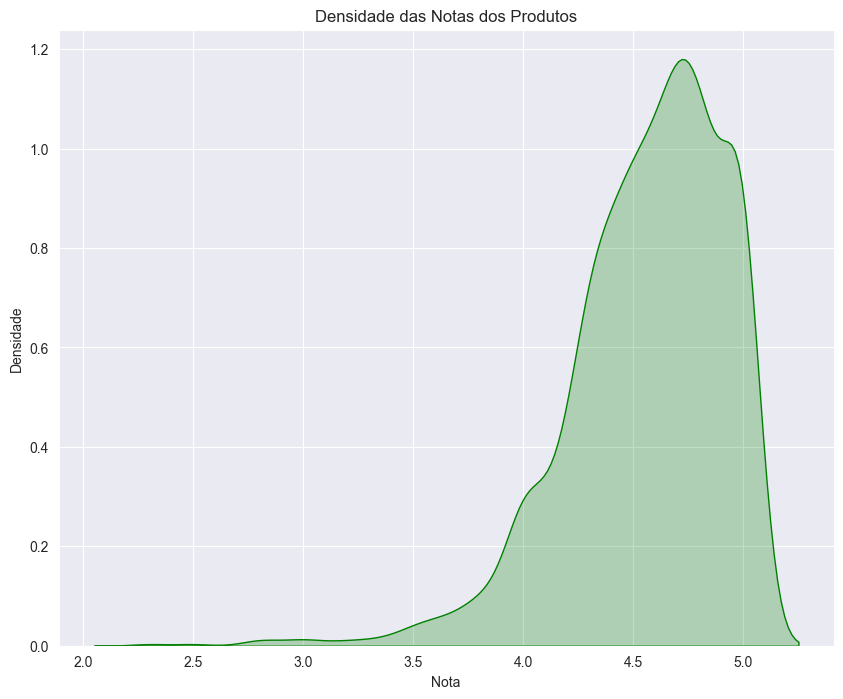

In [25]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['Nota'], fill=True, color='green')
plt.title('Densidade das Notas dos Produtos')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.show()


In [28]:
df.dtypes


Unnamed: 0               int64
Título                  object
Nota                   float64
N_Avaliações           float64
Desconto               float64
Marca                   object
Material                object
Gênero                  object
Temporada               object
Review1                 object
Review2                 object
Review3                 object
Qtd_Vendidos            object
Preço                  float64
Nota_MinMax            float64
N_Avaliações_MinMax    float64
Desconto_MinMax        float64
Preço_MinMax           float64
Marca_Cod                int64
Material_Cod             int64
Temporada_Cod            int64
Qtd_Vendidos_Cod       float64
Marca_Freq             float64
Material_Freq          float64
dtype: object

### Gráfico de Regressão (Desconto vs Nota)

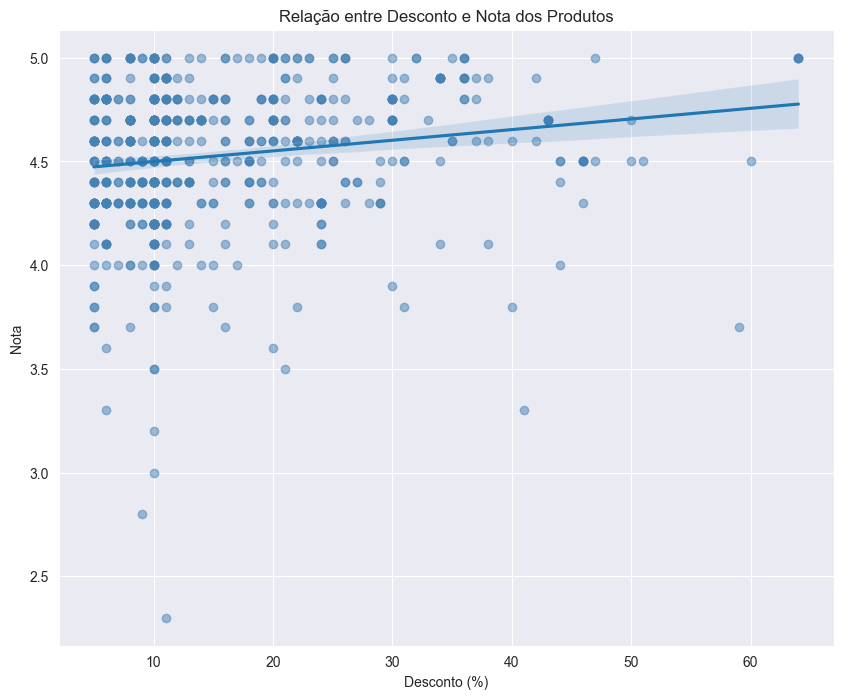

In [29]:
plt.figure(figsize=(10,8))
sns.regplot(
    x='Desconto',
    y='Nota',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'steelblue'}
)
plt.title('Relação entre Desconto e Nota dos Produtos')
plt.xlabel('Desconto (%)')
plt.ylabel('Nota')
plt.show()
